In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("buenos-aires-real-estate-1.csv")

In [95]:
def wrangle(n):
    df = pd.read_csv(n)

    mask_ba = df['place_with_parent_names'].str.contains("Capital Federal")
    mask_apt = df['property_type']== 'apartment'
    mask_price = df['price_aprox_usd'] < 400000
    df = df[mask_ba & mask_apt & mask_price]

    low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
    mask_area = df['surface_covered_in_m2'].between(low, high)
    df= df[mask_area]

    df[['lat', 'lon']] = df['lat-lon'].str.split(',', expand=True)
    df.lat = df['lat'].astype(float)
    df.lon = df['lon'].astype(float)
    return df

In [96]:
wrang1 = wrangle("buenos-aires-real-estate-2.csv")

In [97]:
wrang2 = wrangle("buenos-aires-real-estate-1.csv")

In [98]:
df = pd.concat([wrang1, wrang2])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, 2 to 8604
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   2658 non-null   object 
 1   property_type               2658 non-null   object 
 2   place_with_parent_names     2658 non-null   object 
 3   lat-lon                     2561 non-null   object 
 4   price                       2658 non-null   float64
 5   currency                    2658 non-null   object 
 6   price_aprox_local_currency  2658 non-null   float64
 7   price_aprox_usd             2658 non-null   float64
 8   surface_total_in_m2         1898 non-null   float64
 9   surface_covered_in_m2       2658 non-null   float64
 10  price_usd_per_m2            1818 non-null   float64
 11  price_per_m2                2658 non-null   float64
 12  floor                       769 non-null    float64
 13  rooms                       2137 non-n

In [125]:
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon,neighbrhood,neighborhood
2,sell,apartment,|Argentina|Capital Federal|Recoleta|,"-34.5889927,-58.4001326",215000.0,USD,3259916.00,215000.00,40.0,35.0,5375.000000,6142.857143,NaN,1.0,3500.0,http://recoleta.properati.com.ar/12j4v_venta_d...,-34.588993,-58.400133,Capital Federal,Capital Federal
9,sell,apartment,|Argentina|Capital Federal|Recoleta|,"-34.5880437,-58.3980657",341550.0,USD,5178717.72,341550.00,NaN,90.0,NaN,3795.000000,8.0,2.0,NaN,http://recoleta.properati.com.ar/100t0_venta_d...,-34.588044,-58.398066,Capital Federal,Capital Federal
12,sell,apartment,|Argentina|Capital Federal|Monserrat|,"-34.6233199695,-58.3974607122",1386000.0,ARS,1382153.13,91156.62,39.0,33.0,2337.349231,42000.000000,NaN,NaN,NaN,http://monserrat.properati.com.ar/t05l_venta_d...,-34.623320,-58.397461,Capital Federal,Capital Federal
13,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.553897,-58.451939",105000.0,USD,1592052.00,105000.00,NaN,33.0,NaN,3181.818182,1.0,1.0,NaN,http://belgrano.properati.com.ar/zsd5_venta_de...,-34.553897,-58.451939,Capital Federal,Capital Federal
17,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.6288131,-58.4722301",89681.0,USD,1359779.19,89681.00,46.0,39.0,1949.586957,2299.512821,NaN,1.0,1500.0,http://villa-del-parque.properati.com.ar/12q2f...,-34.628813,-58.472230,Capital Federal,Capital Federal


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, 2 to 8604
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   2658 non-null   object 
 1   property_type               2658 non-null   object 
 2   place_with_parent_names     2658 non-null   object 
 3   lat-lon                     2561 non-null   object 
 4   price                       2658 non-null   float64
 5   currency                    2658 non-null   object 
 6   price_aprox_local_currency  2658 non-null   float64
 7   price_aprox_usd             2658 non-null   float64
 8   surface_total_in_m2         1898 non-null   float64
 9   surface_covered_in_m2       2658 non-null   float64
 10  price_usd_per_m2            1818 non-null   float64
 11  price_per_m2                2658 non-null   float64
 12  floor                       769 non-null    float64
 13  rooms                       2137 non-n

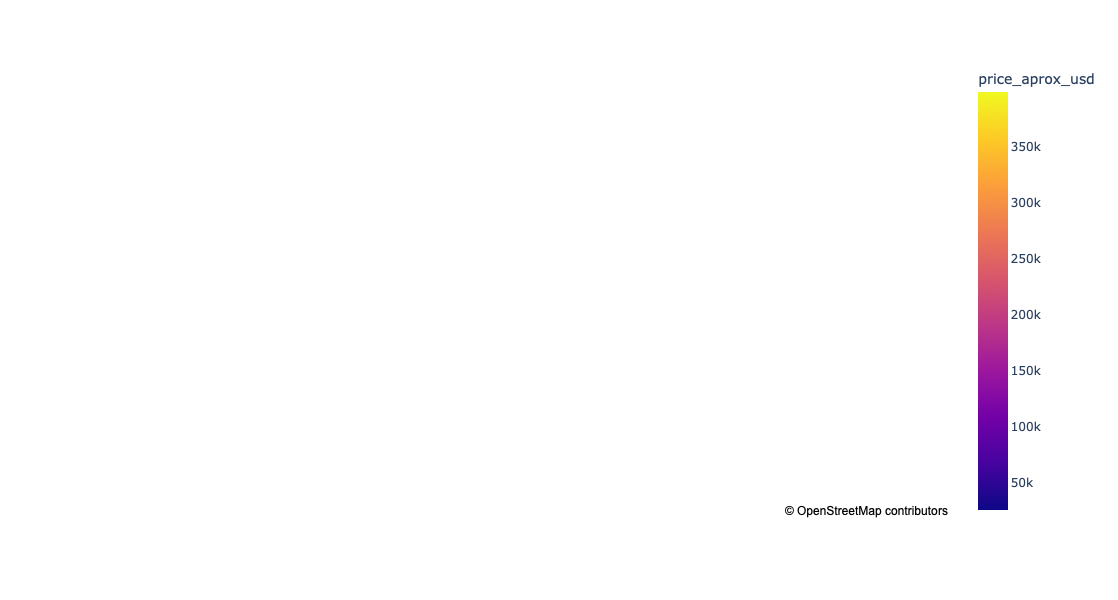

In [100]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    width=600,
    height=600,
    color="price_aprox_usd",
    hover_data=["price_aprox_usd"],
)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

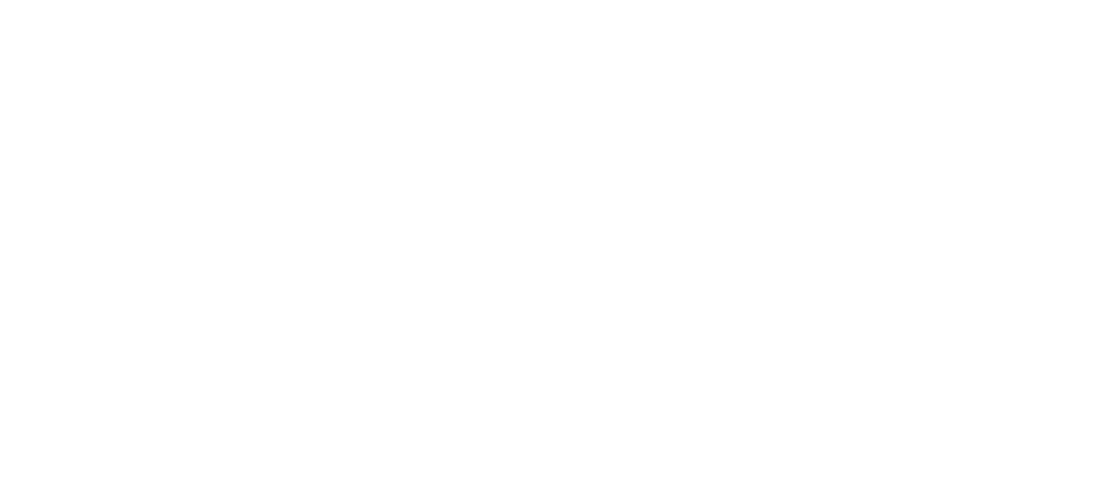

In [102]:
fig = px.scatter_3d(
    df,
    x="lon",
    y="lat",
    z="price_aprox_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# # Create x and y coordinates for model representation
# x_plane = np.linspace(df["lon"].min(), df["lon"].max(), 10)
# y_plane = np.linspace(df["lat"].min(), df["lat"].max(), 10)
# xx, yy = np.meshgrid(x_plane, y_plane)

# # Use model to predict z coordinates
# # z_plane = modelrt.predict(pd.DataFrame({"lat": y_plane, "lon": x_plane,}))
# # zz = np.tile(z_plane, (10, 1))

# # Add plane to figure
# fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [104]:
import plotly.graph_objects as go

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.linear_model import LinearRegression

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
from sklearn.impute import SimpleImputer

In [52]:
X = df[['lat', 'lon']]
y = df['price_aprox_usd']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [56]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('regression', LinearRegression())
])

In [57]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('regression', LinearRegression())])

In [59]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
mse_baseline = mean_squared_error(y_train, y_pred_baseline)

In [60]:
print(f"The MAE basekine is {mae_baseline} and the MSE baseline is {mse_baseline}.")

The MAE basekine is 45639.300791309324 and the MSE baseline is 3611129018.187356.


In [63]:
prediction = pipeline.predict(X_test)

In [65]:
model_mse = mean_squared_error(y_test, prediction)

In [66]:
model_mae = mean_absolute_error(y_test, prediction)

In [69]:
pipeline.score(X_train, y_train)

0.10695023513789692

In [70]:
print(model_mse)

3157671301.5597014


In [71]:
print(model_mae)

42444.832784455175


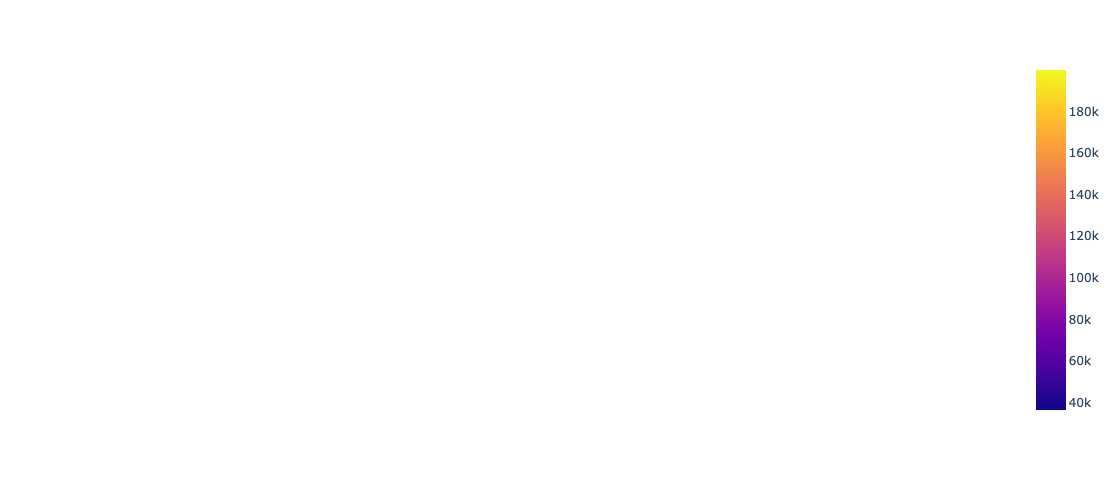

In [109]:
fig = px.scatter_3d(
    df,
    x="lon",
    y="lat",
    z="price_aprox_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Create x and y coordinates for model representation
x_plane = np.linspace(df["lon"].min(), df["lon"].max(), 10)
y_plane = np.linspace(df["lat"].min(), df["lat"].max(), 10)
xx, yy = np.meshgrid(x_plane, y_plane)

# Use model to predict z coordinates
z_plane = pipeline.predict(pd.DataFrame({"lat": y_plane, "lon": x_plane,}))
zz = np.tile(z_plane, (10, 1))

# Add plane to figure
fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [111]:
intercept = pipeline.named_steps['regression'].intercept_

In [112]:
print(intercept)

39640661.4933462


In [115]:
coefficient = pipeline.named_steps['regression'].coef_

In [116]:
print(intercept)

39640661.4933462


In [140]:
df['neighborhood'] = df['place_with_parent_names'].str.split("|", expand=True)[3]

In [141]:
mean_price_by_neighborhood = round(df.groupby("neighborhood")["price_aprox_usd"].mean().sort_values(ascending=False), 2)

In [142]:
print(mean_price_by_neighborhood)

neighborhood
Puerto Madero           254387.92
Las Cañitas             218584.58
Recoleta                197681.56
Barrio Norte            186010.37
Belgrano                170641.29
Nuñez                   167215.56
Palermo                 163050.88
Retiro                  148577.78
Colegiales              147756.61
Villa Urquiza           136768.54
Saavedra                135467.92
Abasto                  131150.00
Caballito               128724.30
Villa General Mitre     126444.44
San Telmo               126435.86
Villa Crespo            125675.70
Villa Luro              124978.92
Villa Pueyrredón        124368.00
Villa Devoto            122405.69
Coghlan                 117988.72
Flores                  117730.77
Chacarita               117305.53
Almagro                 116948.14
Versalles               116000.00
Congreso                114996.22
Once                    114333.33
Monte Castro            113088.89
Parque Chacabuco        112972.12
Villa del Parque        111730.32
B

In [138]:
del df['neighborhood']

In [139]:
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon
2,sell,apartment,|Argentina|Capital Federal|Recoleta|,"-34.5889927,-58.4001326",215000.0,USD,3259916.00,215000.00,40.0,35.0,5375.000000,6142.857143,NaN,1.0,3500.0,http://recoleta.properati.com.ar/12j4v_venta_d...,-34.588993,-58.400133
9,sell,apartment,|Argentina|Capital Federal|Recoleta|,"-34.5880437,-58.3980657",341550.0,USD,5178717.72,341550.00,NaN,90.0,NaN,3795.000000,8.0,2.0,NaN,http://recoleta.properati.com.ar/100t0_venta_d...,-34.588044,-58.398066
12,sell,apartment,|Argentina|Capital Federal|Monserrat|,"-34.6233199695,-58.3974607122",1386000.0,ARS,1382153.13,91156.62,39.0,33.0,2337.349231,42000.000000,NaN,NaN,NaN,http://monserrat.properati.com.ar/t05l_venta_d...,-34.623320,-58.397461
13,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.553897,-58.451939",105000.0,USD,1592052.00,105000.00,NaN,33.0,NaN,3181.818182,1.0,1.0,NaN,http://belgrano.properati.com.ar/zsd5_venta_de...,-34.553897,-58.451939
17,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.6288131,-58.4722301",89681.0,USD,1359779.19,89681.00,46.0,39.0,1949.586957,2299.512821,NaN,1.0,1500.0,http://villa-del-parque.properati.com.ar/12q2f...,-34.628813,-58.472230


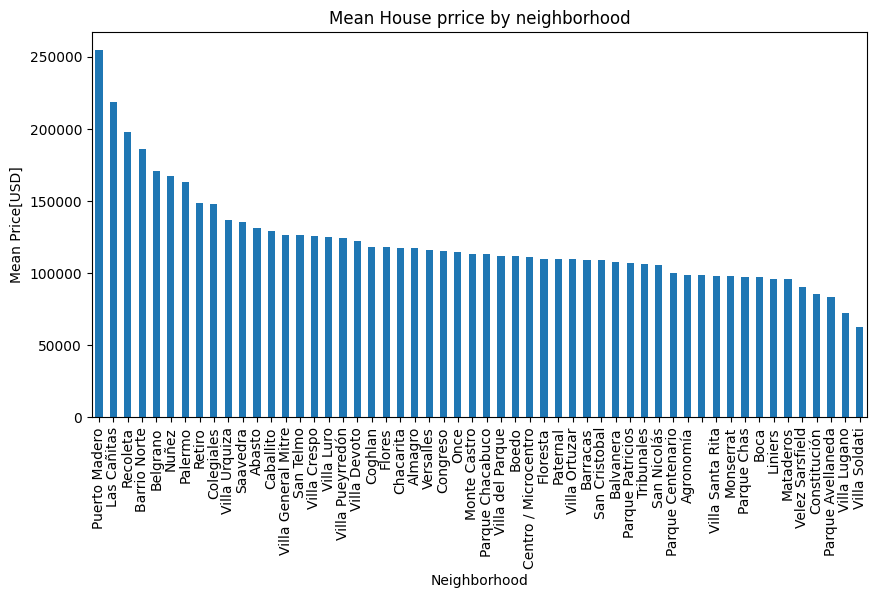

In [146]:
plt.figure(figsize=(10,5))
mean_price_by_neighborhood.plot.bar()
plt.xlabel("Neighborhood")
plt.ylabel("Mean Price[USD]")
plt.title("Mean House prrice by neighborhood")
plt.show()

In [147]:
target = "price_aprox_usd"
features = ['neighborhood']
y_train = df[target]
X_train = df[features]

In [149]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Mean apt price: 134732.97340481562
Baseline MAE: 45422.75166805662


In [153]:
from category_encoders import OneHotEncoder

In [154]:
ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(X_train)

XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train.head(20)

(2658, 54)


,neighborhood_Recoleta,neighborhood_Monserrat,neighborhood_Belgrano,neighborhood_Villa del Parque,neighborhood_Villa Pueyrredón,neighborhood_Almagro,neighborhood_Palermo,neighborhood_,neighborhood_Tribunales,neighborhood_Balvanera,...,neighborhood_Agronomía,neighborhood_Villa Ortuzar,neighborhood_Chacarita,neighborhood_Velez Sarsfield,neighborhood_Monte Castro,neighborhood_Las Cañitas,neighborhood_Constitución,neighborhood_Parque Avellaneda,neighborhood_Villa Soldati,neighborhood_Versalles
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
from sklearn.linear_model import Ridge

In [158]:
model = Pipeline([
    ('ohe', OneHotEncoder(use_cat_names=True)),
    ('r', Ridge())
])

In [159]:
model.fit(X_train, y_train)

Pipeline(steps=[('ohe',
                 OneHotEncoder(cols=['neighborhood'], use_cat_names=True)),
                ('r', Ridge())])

In [162]:
from sklearn.utils.validation import check_is_fitted

In [163]:
check_is_fitted(model)

In [167]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 39518.21


In [168]:
model.score(X_train, y_train)

0.24460047981714772

In [173]:
intercept = model.named_steps['r'].intercept_
coefficients = model.named_steps['r'].coef_
print("coefficient len", len(coefficients))
print(coefficient[:5])

coefficient len 54
[790516.1666052  208019.57368629]


In [174]:
feature_names = model.named_steps['ohe'].get_feature_names_out()
print("features len:", len(feature_names))
print(feature_names[:5])

features len: 54
['neighborhood_Recoleta' 'neighborhood_Monserrat' 'neighborhood_Belgrano'
 'neighborhood_Villa del Parque' 'neighborhood_Villa Pueyrredón']


In [177]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

neighborhood_Recoleta            74031.535872
neighborhood_Monserrat          -24400.060842
neighborhood_Belgrano            47943.993002
neighborhood_Villa del Parque   -10486.993637
neighborhood_Villa Pueyrredón     1785.444816
dtype: float64

In [180]:
print(f"price = {intercept.round()}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = 122493.0
+ (74031.54 * neighborhood_Recoleta)
+ (-24400.06 * neighborhood_Monserrat)
+ (47943.99 * neighborhood_Belgrano)
+ (-10486.99 * neighborhood_Villa del Parque)
+ (1785.44 * neighborhood_Villa Pueyrredón)
+ (-5509.6 * neighborhood_Almagro)
+ (40401.61 * neighborhood_Palermo)
+ (-23396.73 * neighborhood_)
+ (-14431.62 * neighborhood_Tribunales)
+ (-14479.35 * neighborhood_Balvanera)
+ (62622.48 * neighborhood_Barrio Norte)
+ (-7939.41 * neighborhood_Once)
+ (3887.81 * neighborhood_San Telmo)
+ (-46800.91 * neighborhood_Villa Lugano)
+ (-4308.71 * neighborhood_Coghlan)
+ (-13088.77 * neighborhood_Barracas)
+ (14177.48 * neighborhood_Villa Urquiza)
+ (7869.74 * neighborhood_Abasto)
+ (3163.59 * neighborhood_Villa Crespo)
+ (-21877.36 * neighborhood_Villa Santa Rita)
+ (24758.06 * neighborhood_Colegiales)
+ (-12331.95 * neighborhood_Paternal)
+ (6198.22 * neighborhood_Caballito)
+ (-8992.21 * neighborhood_Parque Chacabuco)
+ (24711.63 * neighborhood_Retiro)
+ (-85.16 * neigh

Text(0.5, 1.0, 'Feature Importance For Apartment Price')

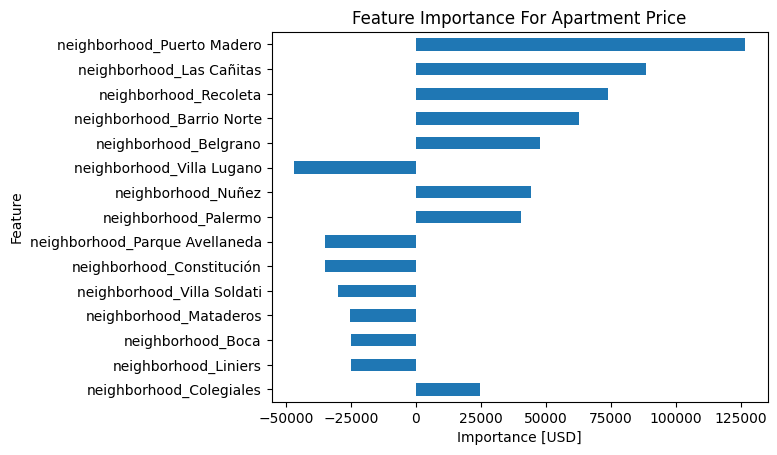

In [181]:
feat_imp.sort_values(key=abs).tail(15).plot(kind='barh')
plt.xlabel('Importance [USD]')
plt.ylabel('Feature')
plt.title("Feature Importance For Apartment Price")

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, 2 to 8604
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   2658 non-null   object 
 1   property_type               2658 non-null   object 
 2   place_with_parent_names     2658 non-null   object 
 3   lat-lon                     2561 non-null   object 
 4   price                       2658 non-null   float64
 5   currency                    2658 non-null   object 
 6   price_aprox_local_currency  2658 non-null   float64
 7   price_aprox_usd             2658 non-null   float64
 8   surface_total_in_m2         1898 non-null   float64
 9   surface_covered_in_m2       2658 non-null   float64
 10  price_usd_per_m2            1818 non-null   float64
 11  price_per_m2                2658 non-null   float64
 12  floor                       769 non-null    float64
 13  rooms                       2137 non-n

In [188]:
y = df["price_aprox_usd"]
X = df[['surface_covered_in_m2', 'lat', 'lon', 'neighborhood']]

In [184]:
from sklearn.preprocessing import LabelEncoder

In [189]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [191]:
le = LabelEncoder()

In [196]:
X.neighborhood = le.fit_transform(X['neighborhood'])

/var/folders/p7/d9_mnjys5ss5hl9mmyf2hsgr0000gn/T/ipykernel_12931/592895546.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
X.head()

,surface_covered_in_m2,lat,lon,neighborhood
2,35.0,-34.588993,-58.400133,34
9,90.0,-34.588044,-58.398066,34
12,33.0,-34.623320,-58.397461,22
13,33.0,-34.553897,-58.451939,7
17,39.0,-34.628813,-58.472230,53


In [198]:
model2 = Pipeline([
    ('si', SimpleImputer(strategy='mean')),
    ('lr', LinearRegression())
])

In [200]:
model2.fit(X, y)

Pipeline(steps=[('si', SimpleImputer()), ('lr', LinearRegression())])

In [201]:
model2.score(X,y)

0.5623010164580731